Saving DALL·E 2024-12-09 10.43.15 - A photo of a goat in a natural setting with low contrast, such as muted colors, dim lighting, or foggy background, making the image appear slightly wa.webp to DALL·E 2024-12-09 10.43.15 - A photo of a goat in a natural setting with low contrast, such as muted colors, dim lighting, or foggy background, making the image appear slightly wa (3).webp
Gambar berhasil dibaca!
Dimensi gambar: (1024, 1024)


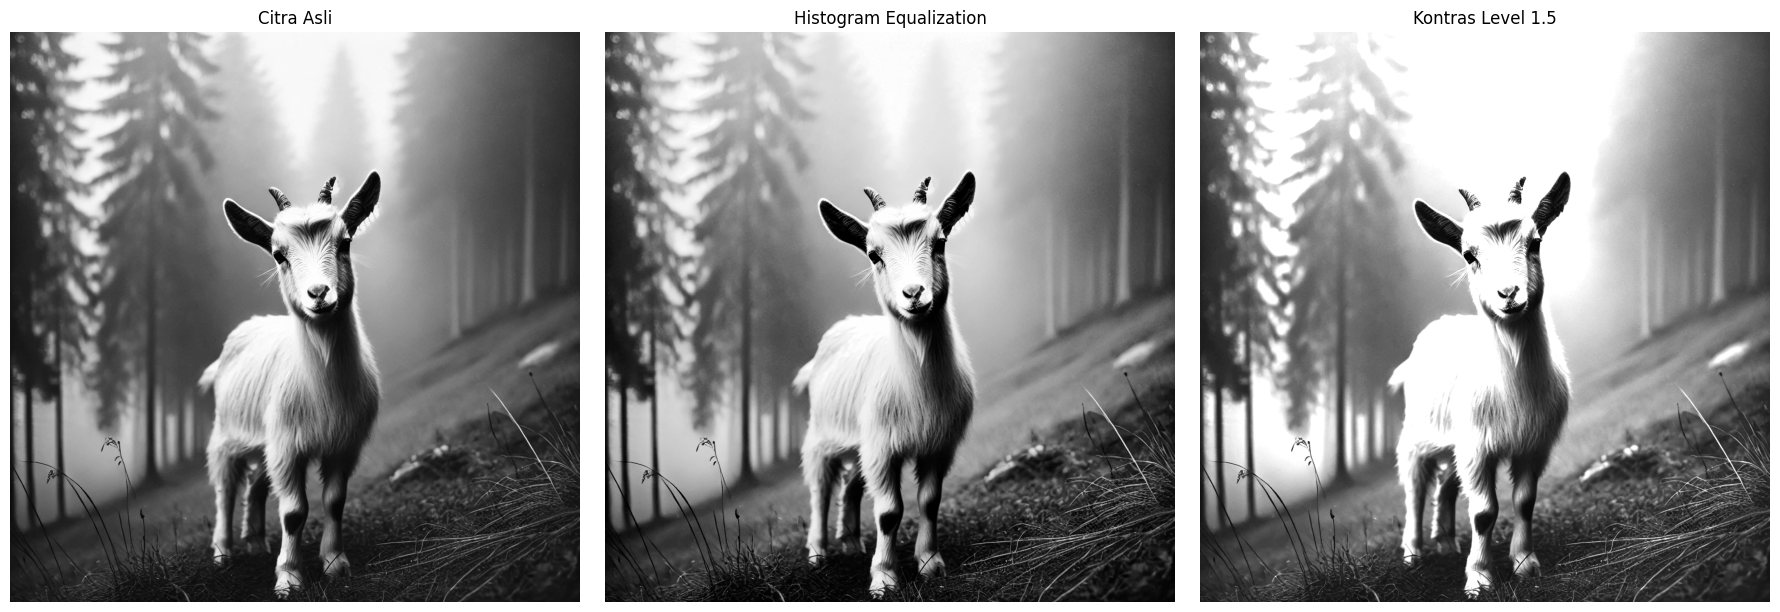

In [18]:
# Import library yang diperlukan
from google.colab import files
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk histogram equalization
def histogram_equalization(image):
    histogram, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = histogram.cumsum()  # Hitung cumulative distribution function (CDF)
    cdf_m = np.ma.masked_equal(cdf, 0)  # Mask CDF untuk nilai nol
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalisasi
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Kembalikan nilai yang dimask
    return cdf[image]

# Fungsi untuk meningkatkan kontras dengan faktor tertentu
def increase_contrast(image, factor):
    # Normalisasi nilai piksel ke [0, 1]
    image_normalized = image / 255.0
    # Tingkatkan kontras
    image_contrast = np.clip(image_normalized * factor, 0, 1)
    # Kembalikan ke rentang piksel [0, 255]
    return (image_contrast * 255).astype('uint8')

# Langkah 1: Unggah gambar
uploaded = files.upload()  # Pilih gambar
image_path = next(iter(uploaded))  # Ambil nama file yang diunggah
image = iio.imread(image_path, mode='L')  # Membaca gambar sebagai grayscale

# Validasi gambar
if image is not None:
    print("Gambar berhasil dibaca!")
    print(f"Dimensi gambar: {image.shape}")

    # Langkah 2: Terapkan Histogram Equalization
    image_hist_eq = histogram_equalization(image)

    # Langkah 3: Tingkatkan kontras dengan faktor 1.5
    contrast_factor = 1.5
    image_contrast = increase_contrast(image, contrast_factor)

    # Langkah 4: Tampilkan semua hasil
    plt.figure(figsize=(18, 6))

    # Gambar Asli
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Citra Asli")
    plt.axis('off')

    # Histogram Equalization
    plt.subplot(1, 3, 2)
    plt.imshow(image_hist_eq, cmap='gray')
    plt.title("Histogram Equalization")
    plt.axis('off')

    # Kontras Tingkat 1.5
    plt.subplot(1, 3, 3)
    plt.imshow(image_contrast, cmap='gray')
    plt.title(f"Kontras Level {contrast_factor}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Gambar tidak berhasil dibaca. Periksa file yang diunggah.")
